In [49]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.stats.power as smp

### 3.5, 3.6, 3.7, 3.8 and 3.9

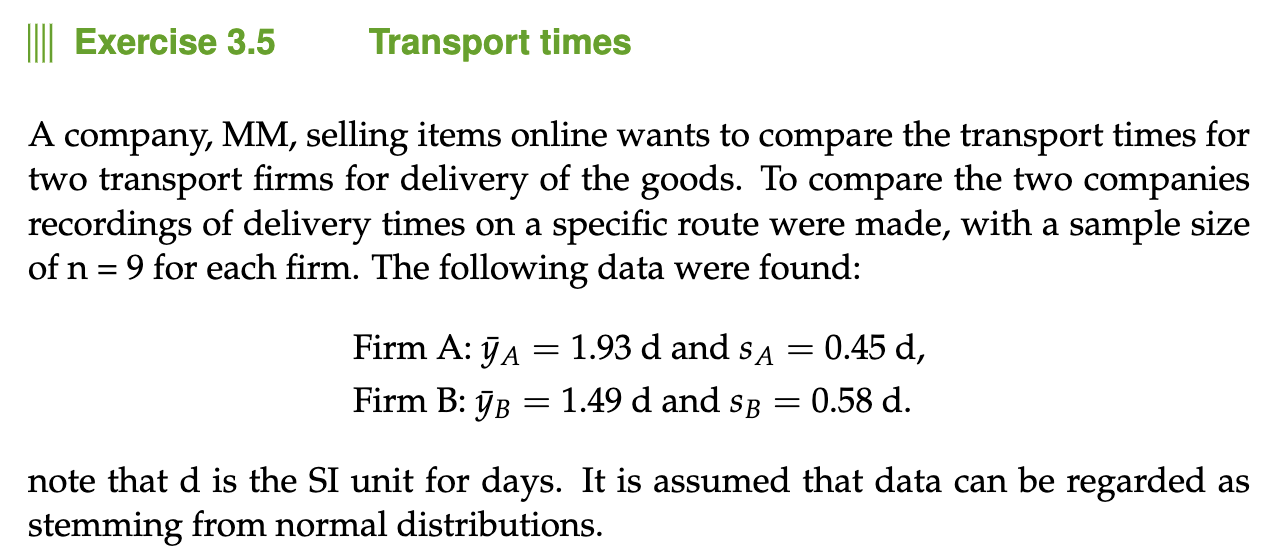

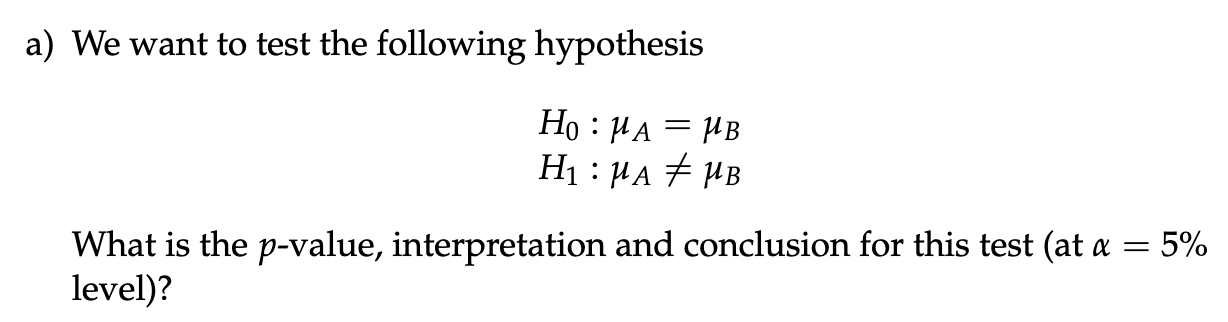

The data is normal distributed

d = [days]

In [50]:
# Company A's data
n_A = 9 # sample size for Company A
mean_A = 1.93 # mean time for Company A
std_A = 0.45 # standard deviation for Company A

# Company B's data
n_B = 9 # sample size for Company B
mean_B = 1.49 # mean time for Company B
std_B = 0.58 # standard deviation for Company B

alpha = 0.05 # significance level

$$H_0:\mu_A = \mu_B$$
$$H_1:\mu_A \neq \mu_B$$


$$\delta=\mu_A-\mu_B$$
$$H_0=\delta=0$$
$$H_1=\delta\neq0$$
The (Welch) 2 sample t-test statistic
$$t_{obs}=\frac{(\bar{x_1}-\bar{x_2})-\delta_0}{\sqrt{s_1^2/n_1+s_2^2/n_2}}$$

$$\nu=\frac{\left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2}{\frac{\left(s_1^2/n_1\right)^2}{n_1-1}+\frac{\left(s_2^2/n_2\right)^2}{n_2-1}}$$

In [51]:
# Welch's t-test
delta_0 = 0 # hypothesized difference in means
tobs = ((mean_A - mean_B) - delta_0) /(np.sqrt((std_A**2 / n_A) + (std_B**2 / n_B)))
nu = ((std_A**2 / n_A) + (std_B**2 / n_B))**2 / (((std_A**2 / n_A)**2 / (n_A - 1)) + ((std_B**2 / n_B)**2 / (n_B - 1)))
tobs, nu


(np.float64(1.7981248351046575), 15.069646790733499)

In [52]:
p_value = 2 * stats.t.sf(np.abs(tobs), df=nu) 
p_value

np.float64(0.09221726347624928)

In [53]:
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the mean times of Company A and Company B.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the mean times of Company A and Company B.")

Fail to reject the null hypothesis: There is no significant difference between the mean times of Company A and Company B.


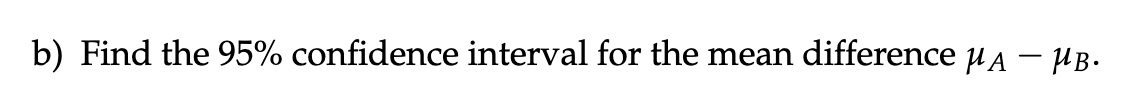

In [54]:
diff = mean_A - mean_B 
se_diff = np.sqrt((std_A**2 / n_A) + (std_B**2 / n_B))
t_crit = stats.t.ppf(1 - alpha/2, df=nu)

ci_lower = diff - t_crit * se_diff
ci_upper = diff + t_crit * se_diff
display(ci_lower, ci_upper)

np.float64(-0.08135447566699117)

np.float64(0.9613544756669911)

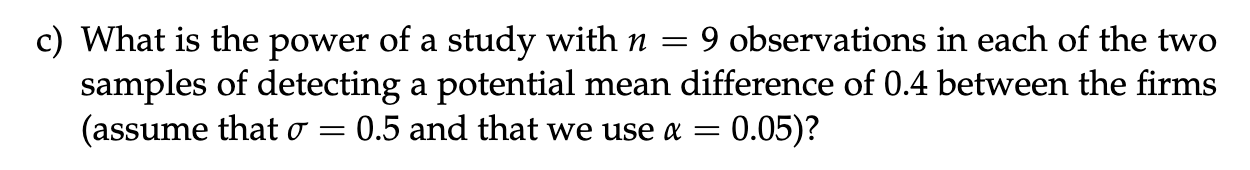

Pooled two sample t-test

In [55]:
n = 9 # sample size
delta_0 = 0.4 # hypothesized difference in means
sigma = 0.5 # assumed common standard deviation
alpha = 0.05 # significance level
print(smp.TTestIndPower().solve_power(nobs1=n, effect_size=delta_0/sigma, alpha=alpha))



0.3579489548777971


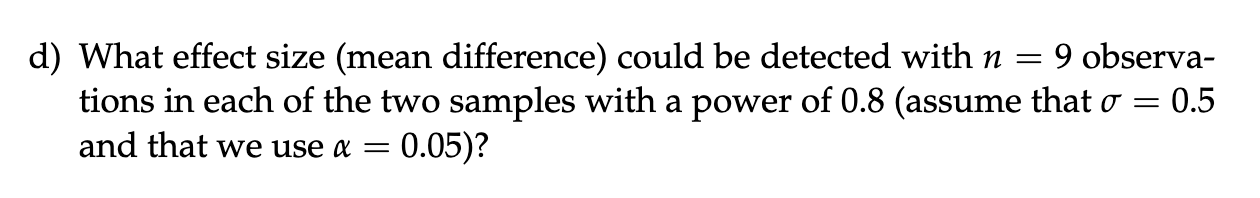

In [56]:
n = 9
power = 0.8
sd = 0.5
alpha = 0.05
effect = smp.TTestIndPower().solve_power(nobs1=n, power=power, alpha=alpha)
delta = effect * sd
delta

0.703462326340127

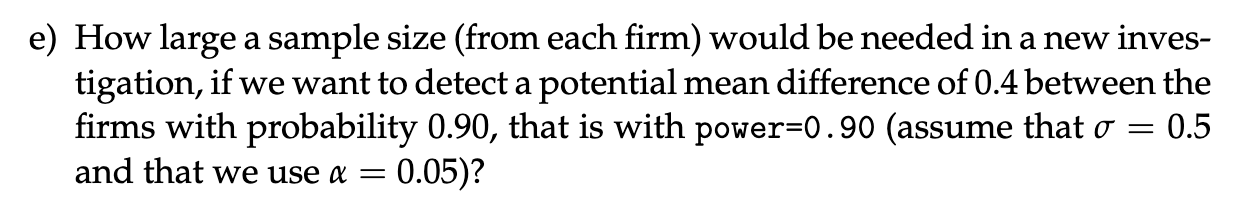

In [57]:
power = 0.9
sd = 0.5
delta = 0.4
alpha = 0.05
n_required = smp.TTestIndPower().solve_power(effect_size=delta/sd, power=power, alpha=alpha)
n_required

33.82554234416028

We would need a sample size of 34 from each company

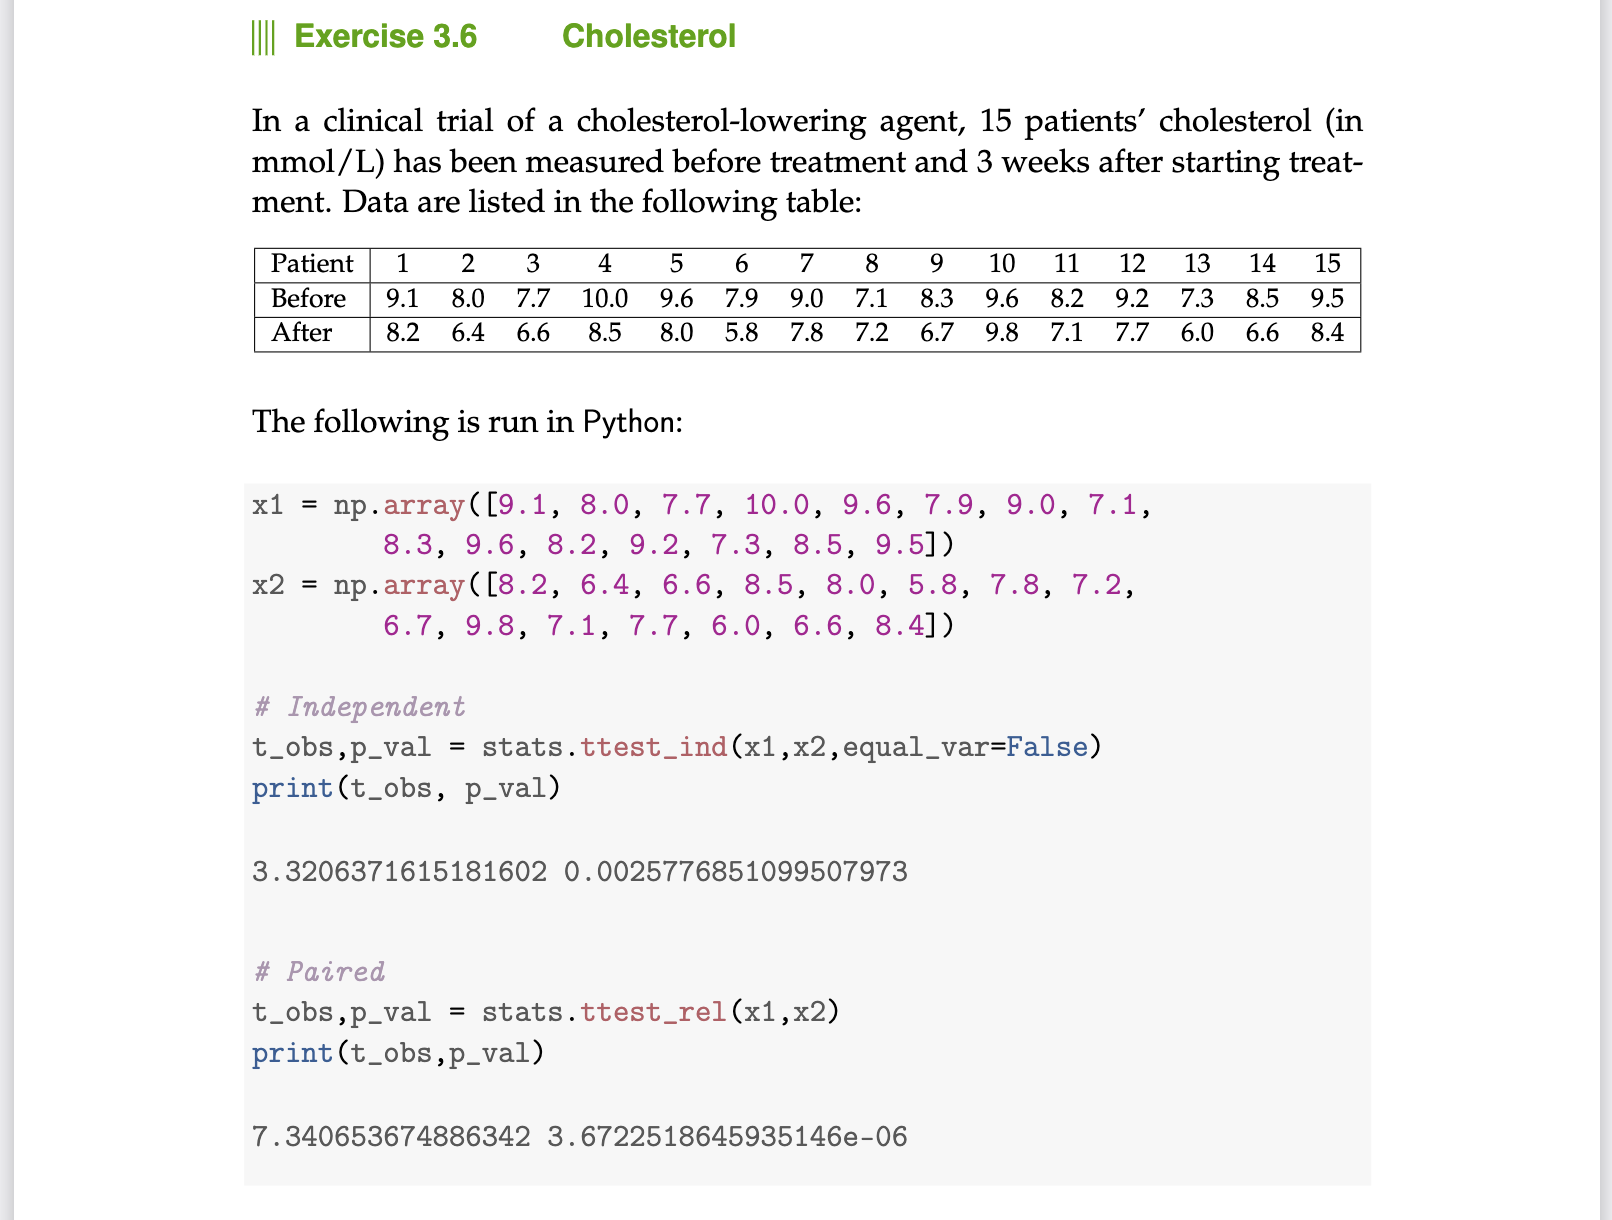

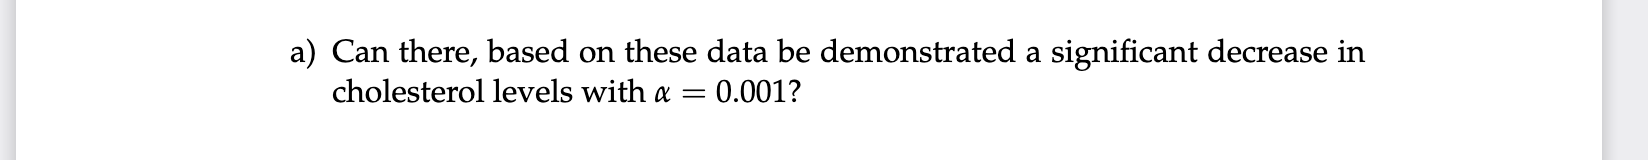

Vi kigger på en paired t-test da de 15 patienter er de samme i de 2 forsøg.
Det betyder at vi kan regne på dem med vores regler for 1 målgruppe

$$d_i=x_i-y_i,\quad for \: i =1,2,\dots,n$$

In [58]:
a = 0.001
p = 3.67*10**-6

if p < a:
    print("Reject the null hypothesis: There is a significant difference between the mean times of Company A and Company B.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the mean times of Company A and Company B.")

Reject the null hypothesis: There is a significant difference between the mean times of Company A and Company B.


We can't reject that there should be significant evidence to support that the difference is 0, thus the drug has a significant effet. (Non directional it could be for the worse, but unlikely when compairing mean before and after)

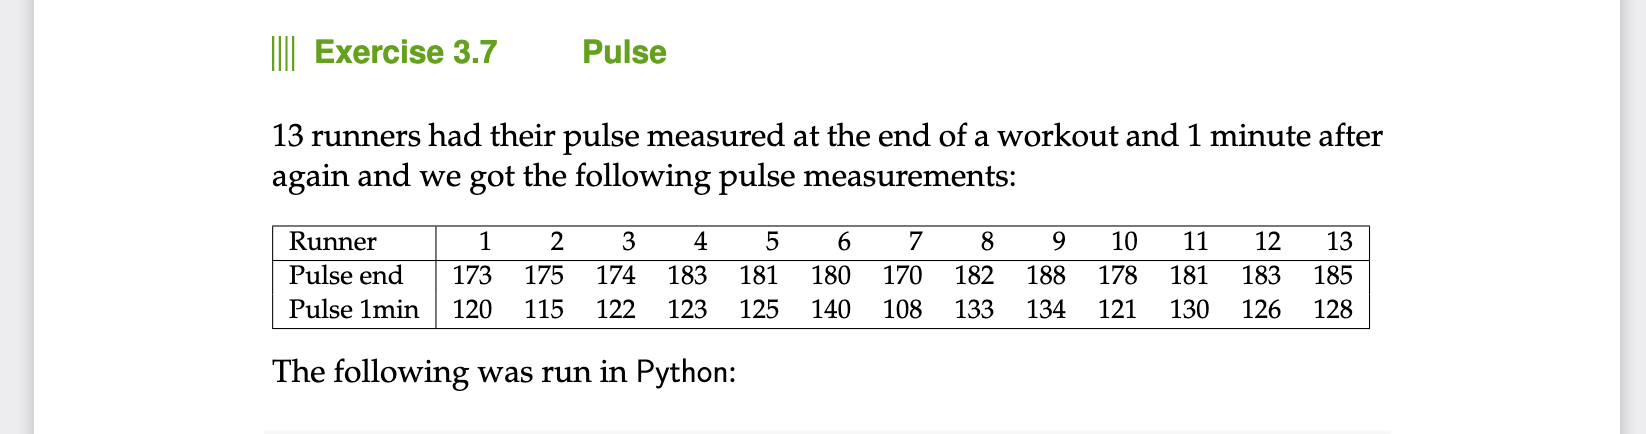

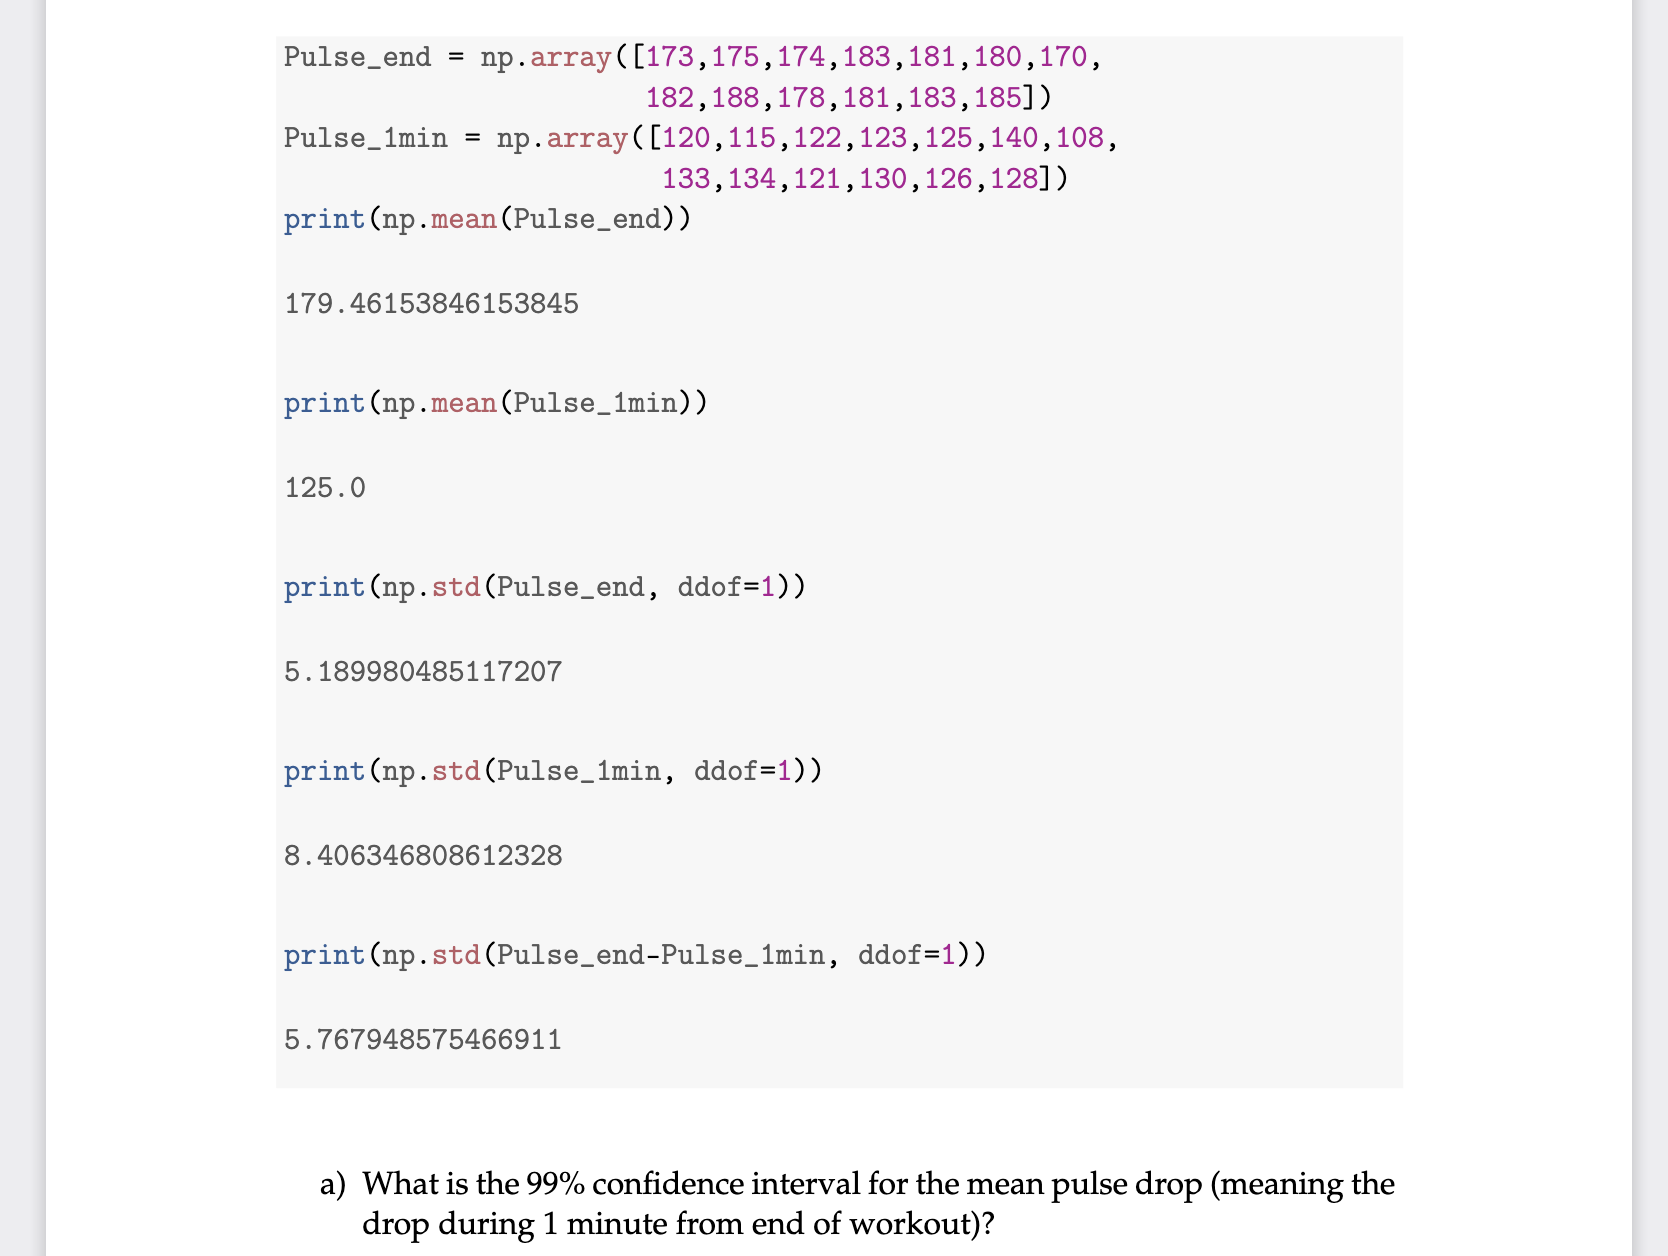

what is the 99%-CI $\Rightarrow\alpha=0.001$ for the mean pulse drop

In [59]:
t=stats.t.ppf(1-0.001/2, df=12)
print(179.5-125.0-t*(5.768/np.sqrt(13)),179.5-125.0+t*(5.768/np.sqrt(13)))

47.59259022515607 61.40740977484393


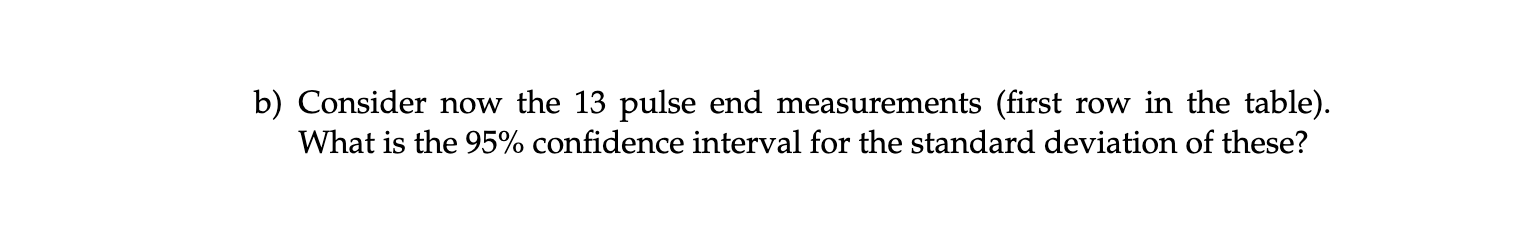

In [61]:
CI = 95
alpha = 1 - CI/100
n = 13
s = 5.18998

print(np.sqrt((n-1)*s**2/stats.chi2.ppf(1-alpha/2, df=n-1)),np.sqrt((n-1)*s**2/stats.chi2.ppf(alpha/2, df=n-1)))

3.7216619232229977 8.567282356980048
